In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [2]:
#Plot setup

sns.set_theme(style="darkgrid")
width = 10
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

In [3]:
divvy = pd.read_csv("divvy_bikes_2023.csv")
divvy.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [4]:
#checking the information of the data

divvy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133286 entries, 0 to 5133285
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 509.1+ MB


In [5]:
#couting the member distribution

divvy["member_casual"].value_counts()

member_casual
member    3224171
casual    1909115
Name: count, dtype: int64

In [6]:
#checking the empty values

divvy.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    785003
start_station_id      785135
end_station_name      833379
end_station_id        833520
start_lat                  0
start_lng                  0
end_lat                 6401
end_lng                 6401
member_casual              0
dtype: int64

In [7]:
# % of rows missing in each column
for column in divvy.columns:
    percentage_na = divvy[column].isna().mean()
    print(f'{column}: {round(percentage_na * 100, 2)}%')

ride_id: 0.0%
rideable_type: 0.0%
started_at: 0.0%
ended_at: 0.0%
start_station_name: 15.29%
start_station_id: 15.29%
end_station_name: 16.23%
end_station_id: 16.24%
start_lat: 0.0%
start_lng: 0.0%
end_lat: 0.12%
end_lng: 0.12%
member_casual: 0.0%


In [8]:
#Change the dates colunm into datetime type so I can further analyse it. 
divvy["start_datetime"] = pd.to_datetime(divvy["started_at"], format = "%Y-%m-%d %H:%M:%S", errors= "coerce")

In [9]:
divvy["end_datetime"] = pd.to_datetime(divvy["ended_at"])

In [10]:
#checking the information of the data after adding datetime data. 

divvy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133286 entries, 0 to 5133285
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_datetime      datetime64[ns]
 14  end_datetime        datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 587.5+ MB


In [11]:
#criando colunas ano-mes-dia-hora-min-seg para realizar seleções especificas

#start_date
divvy["start_year"] = divvy["start_datetime"].dt.year
divvy["start_month"] = divvy["start_datetime"].dt.month
divvy["start_day"] = divvy["start_datetime"].dt.day
divvy["start_hour"] = divvy["start_datetime"].dt.hour
divvy["start_minute"] = divvy["start_datetime"].dt.minute
divvy["start_minute"] = divvy["start_datetime"].dt.minute
divvy["start_dow"] = divvy["start_datetime"].dt.day_name()
divvy["start_month"] = divvy["start_datetime"].dt.month_name()

#end_date
divvy["end_year"] = divvy["end_datetime"].dt.year
divvy["end_month"] = divvy["end_datetime"].dt.month
divvy["end_day"] = divvy["end_datetime"].dt.day
divvy["end_hour"] = divvy["end_datetime"].dt.hour
divvy["end_minute"] = divvy["end_datetime"].dt.minute
divvy["end_dow"] = divvy["end_datetime"].dt.day_name()
divvy["end_month"] = divvy["end_datetime"].dt.month_name()

#adding travel duration
divvy["travel_duration"] = (divvy["end_datetime"] - divvy["start_datetime"]).dt.total_seconds() / 60

In [12]:
#checking the information of the data after adding datetime data. 

divvy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133286 entries, 0 to 5133285
Data columns (total 28 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_datetime      datetime64[ns]
 14  end_datetime        datetime64[ns]
 15  start_year          int32         
 16  start_month         object        
 17  start_day           int32         
 18  start_hour          int32         
 19  start_minute        int32         
 20  st

In [13]:
#Checking the dow frequency.  

day_count = divvy.groupby(["start_dow", "member_casual"])[["start_station_name", "end_station_name"]].value_counts().reset_index().copy()
day_count.columns = ["start_name","end_name","dow", "membership","total"]

In [28]:
day_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826025 entries, 0 to 826024
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   start_name  826025 non-null  object
 1   end_name    826025 non-null  object
 2   dow         826025 non-null  object
 3   membership  826025 non-null  object
 4   total       826025 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 31.5+ MB


<Axes: xlabel='start_dow', ylabel='start_hour'>

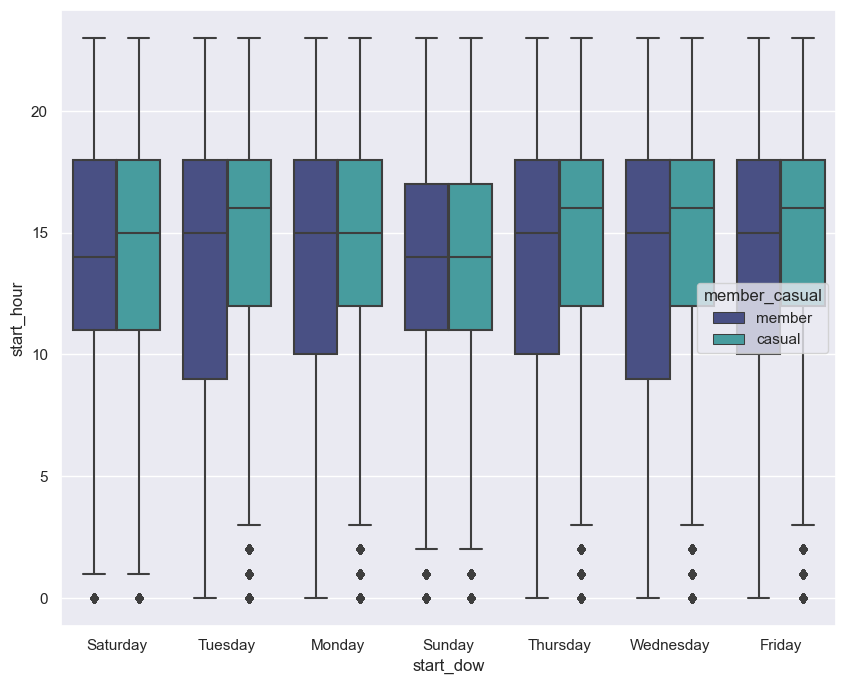

In [16]:
#checking the hour the bikes are used by members by weekdays

sns.boxplot(data = divvy, 
            x = "start_dow", 
            y = "start_hour",
            hue= "member_casual",
            palette= "mako")

In [17]:
# Creating a dataset with the mean time use by users.
mean_time = divvy.groupby(["start_dow", "member_casual"])[["travel_duration"]].mean().reset_index()
mean_time.columns = ["start_dow", "member_casual", "travel_duration_mean"]

<Axes: xlabel='start_dow', ylabel='travel_duration_mean'>

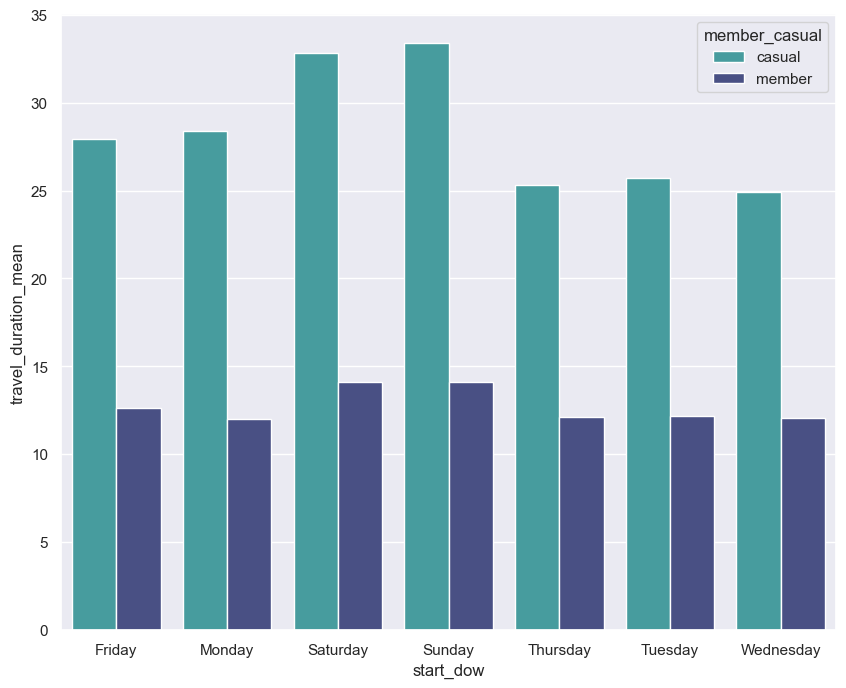

In [18]:
# Ploting the new dataset with the mean information
sns.barplot(data = mean_time,
            x = "start_dow", 
            y = "travel_duration_mean", 
            hue = "member_casual",
            palette = "mako_r")

In [19]:
# Creating a dataset with the couting of the bike by type by dow

bike_preference_dow = divvy.groupby(["start_dow", "member_casual"])[["rideable_type"]].value_counts().reset_index()
bike_preference_dow.columns = ["start_dow","member_casual", "rideable_type", "total"]

#By Month
bike_preference_month = divvy.groupby(["start_month", "member_casual"])[["rideable_type"]].value_counts().reset_index()
bike_preference_month.columns = ["start_month","member_casual", "rideable_type", "total"]


<Axes: xlabel='start_dow', ylabel='total'>

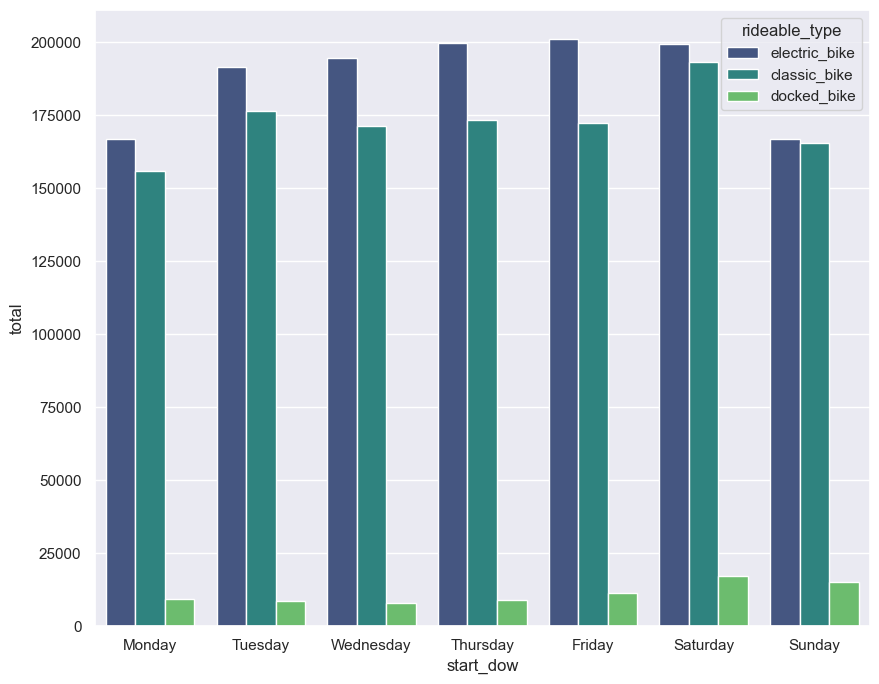

In [20]:
# Ploting the most used bike type by dow
sns.barplot(data = bike_preference_dow,
            x = "start_dow", 
            y = "total", 
            hue = "rideable_type",
            order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            palette = "viridis",
            errorbar=None)

<Axes: xlabel='start_month', ylabel='total'>

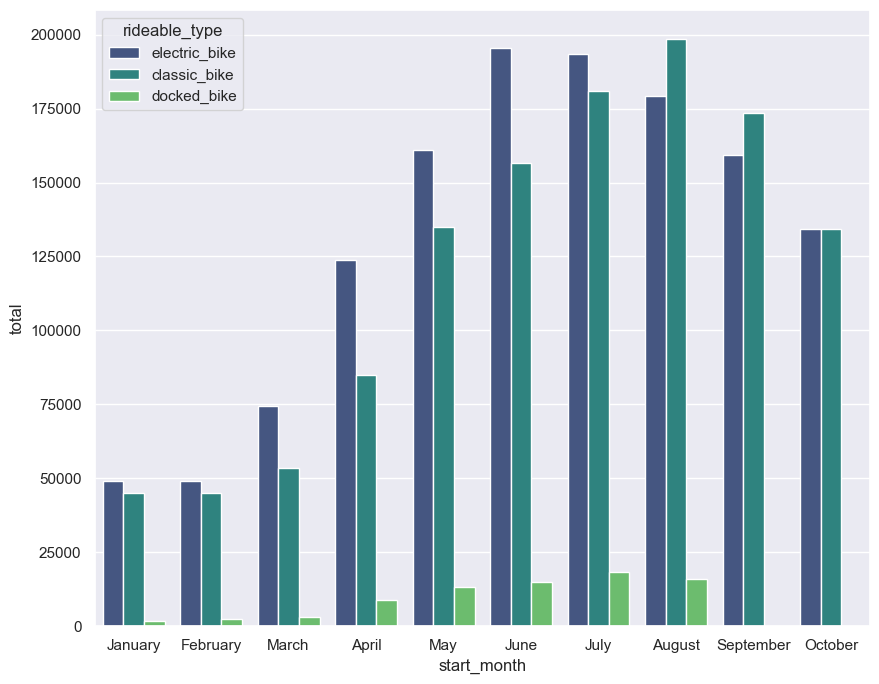

In [21]:
# Ploting the most used bike type by month
sns.barplot(data = bike_preference_month,
            x = "start_month", 
            y = "total", 
            hue = "rideable_type",
            order= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"],
            palette = "viridis",
            errorbar= None)

<Axes: xlabel='start_dow', ylabel='total'>

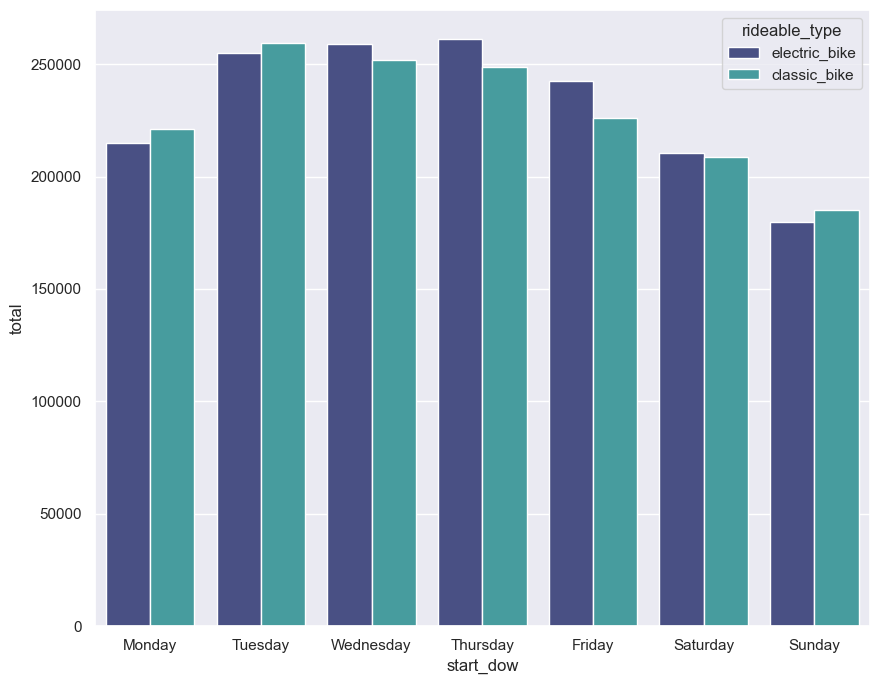

In [22]:
# Most used bikes by members by dow
sns.barplot(bike_preference_dow.query("member_casual == 'member'"),
            x = "start_dow", 
            y = "total", 
            hue = "rideable_type",
            order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            palette = "mako")


<Axes: xlabel='start_month', ylabel='total'>

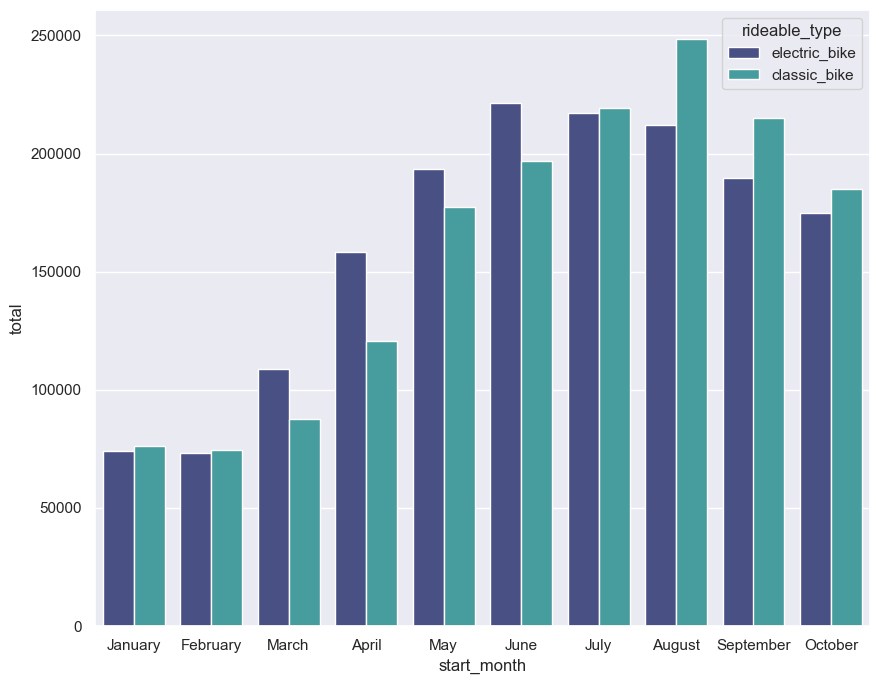

In [23]:
# Most used bikes by members by month.
sns.barplot(bike_preference_month.query("member_casual == 'member'"),
            x = "start_month", 
            y = "total", 
            hue = "rideable_type",
            order= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"],
            palette = "mako")

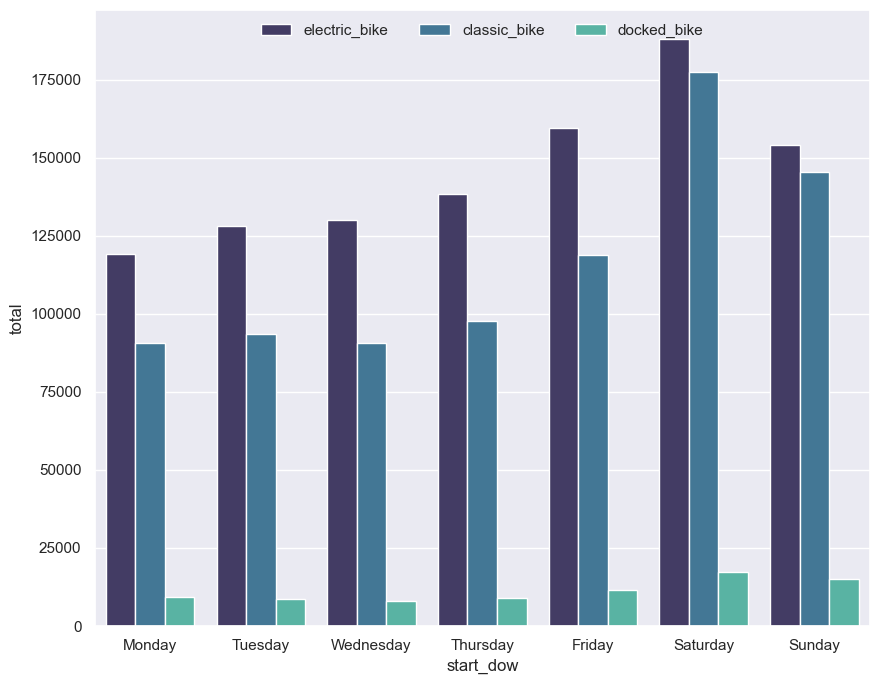

In [24]:
# Most used bikes by casuals by dow.
casual_bike_type_plot = sns.barplot(bike_preference_dow.query("member_casual == 'casual'"),
            x = "start_dow", 
            y = "total", 
            hue = "rideable_type",
            order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            palette = "mako")
sns.move_legend(casual_bike_type_plot, 
                "upper center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

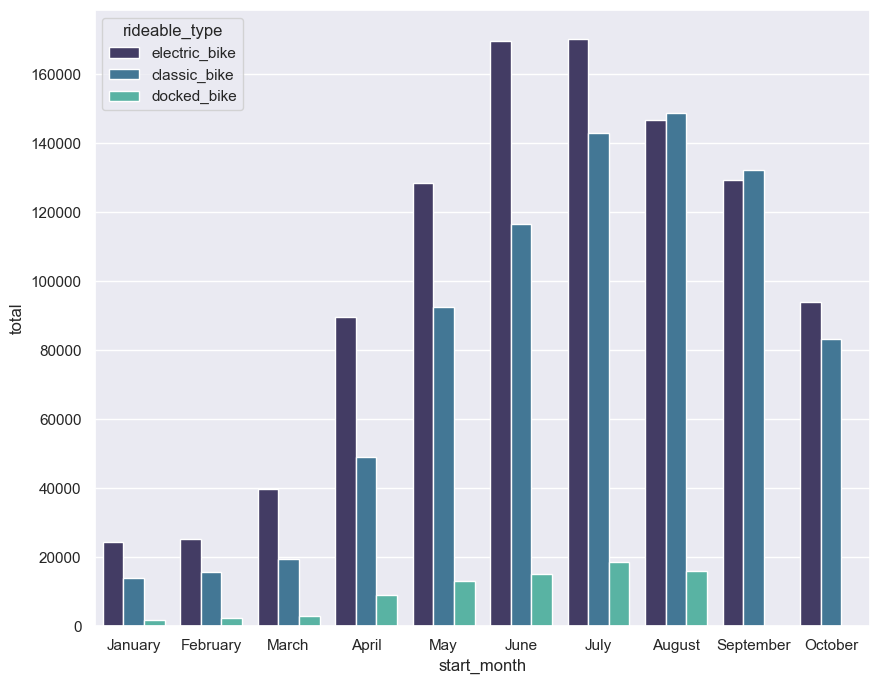

In [25]:
# Most used bikes by Casuals by month.
sns.barplot(bike_preference_month.query("member_casual == 'casual'"),
            x = "start_month", 
            y = "total", 
            hue = "rideable_type",
            order= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"],
            palette = "mako")
sns.move_legend(casual_bike_type_plot, 
                "upper center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)